In [1]:
import sys
import os

sys.path.append(os.path.join(os.getcwd(), "packages"))
import getimage

In [4]:
def image_processing(start_date="2017-10-01",num_days=None,end_date="2017-10-10",**kwargs):
    

    from numpy import *
    from PIL import Image
    import matplotlib.pyplot as plt
    %matplotlib inline
    import imageio
    from scipy import signal

    l = getimage.get_image_date_range(start_date,num_days,end_date,**kwargs)

    plt.axis('off')

    w,h=l[0].shape
    arr=zeros((h,w),float)
    N=len(l)



    for im in l:
        imarr=array(im,dtype=float)
        arr=arr+imarr/N
    out = matrix.round(arr)
    out *= 255.0/out.max()    
    out = signal.wiener(out,5)

    avg=60

    for i in range(out.shape[1]):
        for j in range(out.shape[0]):
            if out[i][j]<=1.7*avg and out[i][j]>=0.9*avg:
                out[i][j]*=0.5

    filtered = signal.wiener(out,5)
    fig=plt.figure(figsize=(10,10))
    plt.imshow(filtered)




<ipython-input-4-54f67c43da4d>:1: SyntaxWarning: import * only allowed at module level
  def image_processing(start_date="2017-10-01",num_days=None,end_date="2017-10-10",**kwargs):


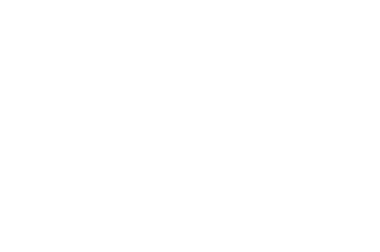

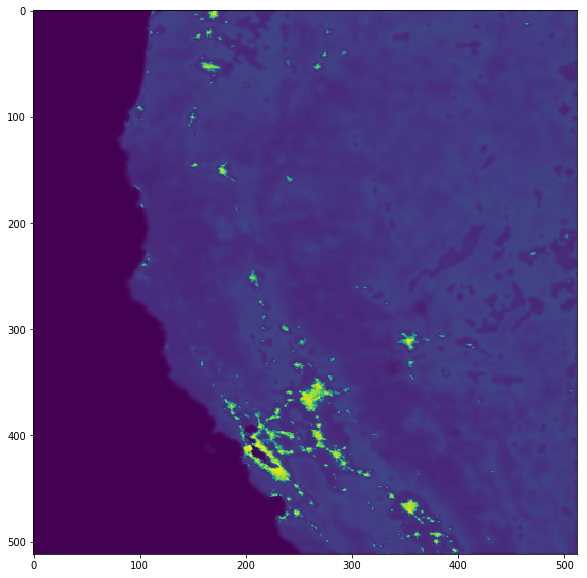

In [5]:
image_processing(start_date="2017-10-01",num_days=None,end_date="2017-10-10")